In [49]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

### read in original spines

In [50]:
spn_fil1, hd = fits.getdata('../data_anika/B5_spine_fil1.fits', header=True)
spn_fil2 = fits.getdata('../data_anika/B5_spine_fil2.fits')

(300, 700)

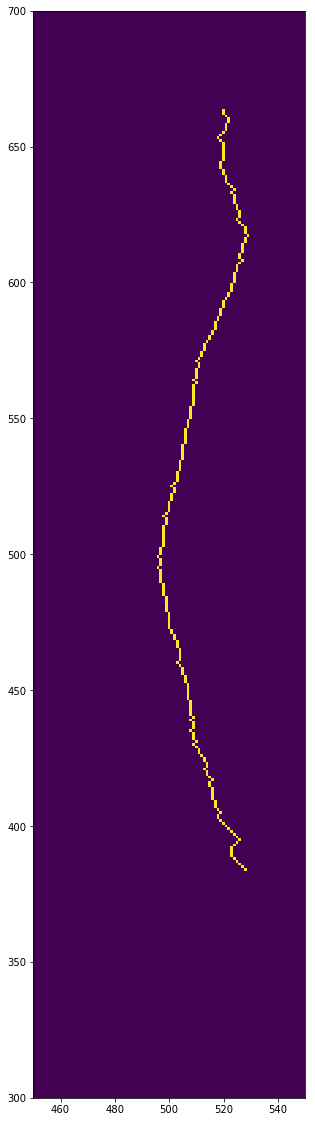

In [77]:
plt.figure(figsize=(20,20))
plt.imshow(spn_fil1>0, origin='lower')

plt.xlim(450,550)
plt.ylim(300, 700)

(200, 520)

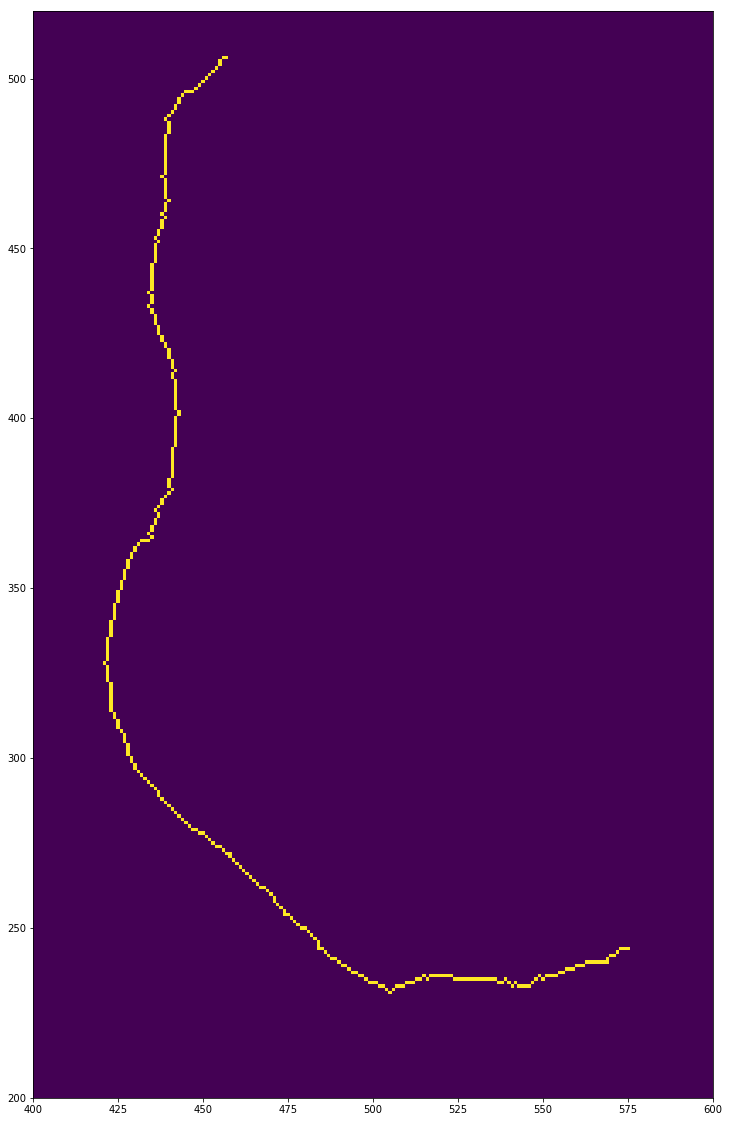

In [94]:
plt.figure(figsize=(20,20))
plt.imshow(spn_fil2==1, origin='lower')

plt.xlim(400,600)
plt.ylim(200, 520)

### Regrid files to smoothed resolution

In [59]:
hd_8as = fits.getheader('B5_mask_fil1.fits')

In [60]:
spn_fil1 = spn_fil1.astype('float64')
spn_fil2 = spn_fil2.astype('float64')

In [61]:
from FITS_tools.hcongrid import hcongrid

new_spn_fil1 = hcongrid(spn_fil1, hd, hd_8as, mode='nearest')
new_spn_fil2 = hcongrid(spn_fil2, hd, hd_8as, mode='nearest')

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [47]:
fits.writeto('eh.fits', new_spn_fil1, hd_8as)

(50, 125)

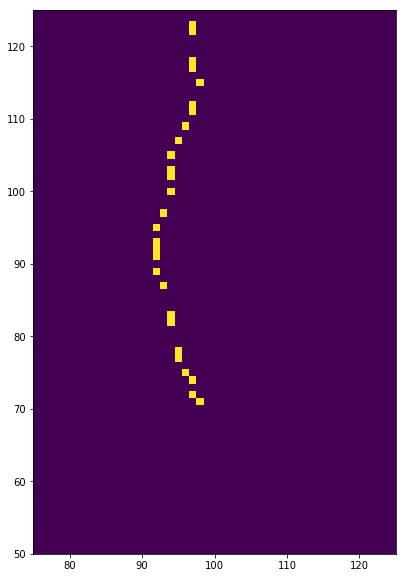

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(new_spn_fil1>0.03, origin='lower')

plt.xlim(75, 125)
plt.ylim(50, 125)

(30, 90)

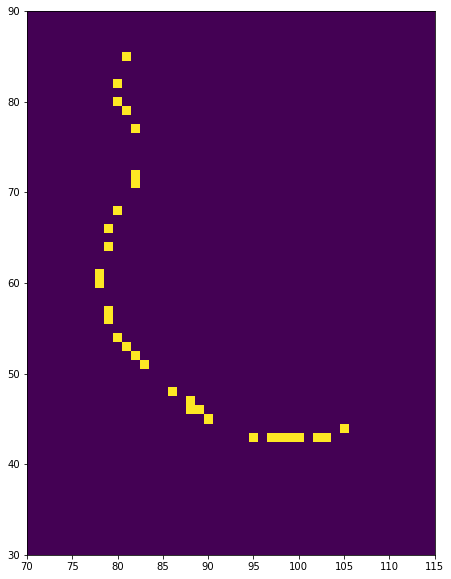

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(new_spn_fil2>0.03, origin='lower')

plt.xlim(70, 115)
plt.ylim(30, 90)

### Loop through the points manually

#### coordinates for pixels in spine

In [115]:
y_pos_fil1 , x_pos_fil1 = np.where(spn_fil1 == 1)
y_pos_fil2 , x_pos_fil2 = np.where(spn_fil2 >0)

(0, 1024)

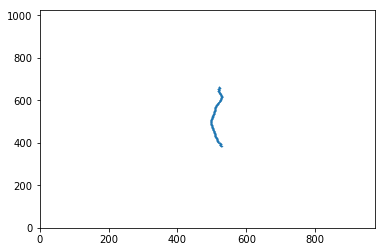

In [116]:
plt.plot(x_pos_fil1, y_pos_fil1,'.', ms=1)

plt.xlim(0, spn_fil1.shape[1])
plt.ylim(0, spn_fil1.shape[0])

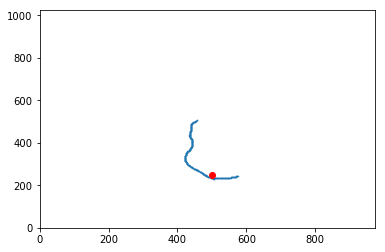

In [123]:
plt.plot(x_pos_fil2, y_pos_fil2, '.', ms=1)

plt.xlim(0, spn_fil2.shape[1])
plt.ylim(0, spn_fil2.shape[0])

# plt.xlim(200,250)

#### WCS info

In [113]:
from astropy import wcs

wcs_orig = wcs.WCS(fits.getheader('../data_anika/B5_mask_fil1.fits'))
wcs_8as = wcs.WCS(fits.getheader('B5_mask_fil1.fits'))

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [127]:
eh = wcs_orig.pixel_to_world(500, 250)
wcs_8as.world_to_pixel(eh)

[array(92.62139918), array(45.875)]

In [126]:
ylen_8as, xlen_8as = fits.getdata('B5_mask_fil1.fits').shape

new_spn_fil1 = np.zeros((ylen_8as, xlen_8as))
new_spn_fil2 = np.zeros((ylen_8as, xlen_8as))

##### Filament 2

In [136]:
for i in range(x_pos_fil2.shape[0]):
    x_i = x_pos_fil2[i]
    y_i = y_pos_fil2[i]
    
    ra_dec = wcs_orig.pixel_to_world(x_i, y_i)
    pix_coords = wcs_8as.world_to_pixel(ra_dec)
    x_8as = int(np.round(pix_coords[0]))
    y_8as = int(np.round(pix_coords[1]))
    
    new_spn_fil2[y_8as, x_8as] = 1

In [137]:
###### ensure 1 pixel per line

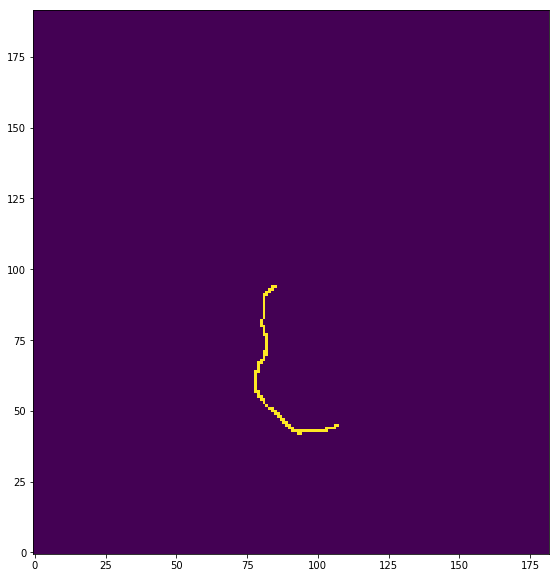

In [139]:
plt.figure(figsize=(10,10))
plt.imshow(new_spn_fil2>0.03, origin='lower')

# plt.xlim(75, 125)
# plt.ylim(50, 125)

# plt.plot(98, 71, 'ro')

In [ ]:
# new_spn_fil1[123, 96] = 0
# new_spn_fil1[122, 97] = 0


##### Filament 1

In [128]:
for i in range(x_pos_fil1.shape[0]):
    x_i = x_pos_fil1[i]
    y_i = y_pos_fil1[i]
    
    ra_dec = wcs_orig.pixel_to_world(x_i, y_i)
    pix_coords = wcs_8as.world_to_pixel(ra_dec)
    x_8as = int(np.round(pix_coords[0]))
    y_8as = int(np.round(pix_coords[1]))
    
    new_spn_fil1[y_8as, x_8as] = 1

In [134]:
###### ensure 1 pixel per line

(50, 125)

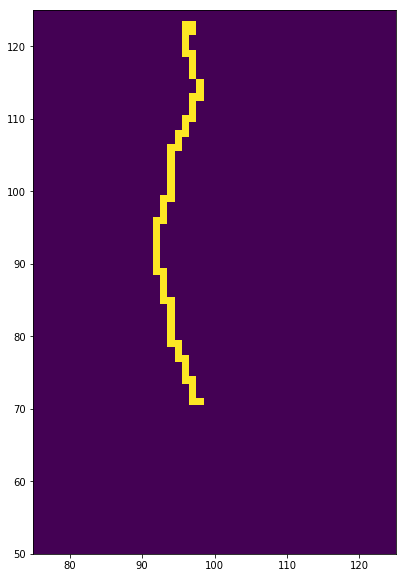

In [135]:
plt.figure(figsize=(10,10))
plt.imshow(new_spn_fil1>0.03, origin='lower')

plt.xlim(75, 125)
plt.ylim(50, 125)

# plt.plot(98, 71, 'ro')

##### write out new spines

In [140]:
fits.writeto('B5_spine_fil1.fits', new_spn_fil1, hd_8as)
fits.writeto('B5_spine_fil2.fits', new_spn_fil2, hd_8as)